# Application data 

**Elaborado por:** Jazmín Fernández Ramírez, Jacqueline Fernández Ramírez, Nina Odoux.
Máster Universitario de Ciencia de Datos (MUCD) - CUNEF Universidad.

El conjunto de datos Bank Account Fraud (BAF) se publicó en NeurIPS 2022 y comprende un total de 6 conjuntos de datos tabulares sintéticos diferentes sobre fraude en cuentas bancarias. BAF es un banco de pruebas realista, completo y sólido para evaluar métodos nuevos y existentes en ML y ML justo.

## Definición del problema:

El principal desafío que este proyecto de aprendizaje automático procura resolver es la detección y reducción del peligro de fraude en peticiones de préstamos bancarios. Mediante el uso del conjunto de datos "Bank Account Fraud (BAF)", la finalidad es elaborar un modelo predictivo capaz de diferenciar entre los solicitantes que pueden pagar el préstamo y los que podrían cometer fraude o enfrentar problemas para cumplir con sus compromisos financieros. El reto consiste en identificar patrones y rasgos en la información que sugieran conductas fraudulentas, garantizando simultáneamente que los clientes confiables y financieramente estables no sean desestimados de manera injusta.

## Objetivo de la práctica:

El propósito de este proyecto es emplear métodos de Análisis Exploratorio de Datos (EDA) con el fin de entender y examinar los patrones que se encuentran en el conjunto de datos "Bank Account Fraud (BAF)", publicado en NeurIPS 2022). Este estudio tiene un objetivo concreto: ayudar a un banco en la valoración de peticiones de créditos y en la detección de posibles fraudes. Al emplear información auténtica vinculada a fraudes en cuentas bancarias, se pretende asegurar que los solicitantes con la capacidad de saldar el préstamo no sean rechazados de manera injusta. Al mismo tiempo, se busca detectar patrones que muestren si un cliente podría enfrentar problemas para reembolsar el préstamo, lo que resulta vital para la toma de decisiones anticipadas y la reducción de riesgos. Con el empleo de este EDA, se busca identificar patrones esenciales que faciliten la mejora de los procesos de aprobación de préstamos y disminuyan la prevalencia de fraudes financieros

**Ejecución del modelo:** El modelo se va a ejecutar en el momento en el que se solicita un préstamo. Por esta razón, en este caso de estudio no se toman en consideración variables a futuro, ya que todos los datos se rellenarán a la hora de solicitar el préstamo. 

### Pasos a realizar: 

1. Análisis inicial de los datos y preprocesamiento inicial.
2. Correlaciones, tratamiento de missing y outliers.
3. Tratamiento de variables categoricas: encoding.
4. Escalado de las variables.

## Importación de librerías

In [93]:
import pandas as pd
import matplotlib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 5000)
seed = np.random.seed(123)

In [94]:
import sys
sys.path.append("../src")  

import funciones_auxiliares 

## Revisión del directorio de trabajo

In [96]:
import os #paquete de lectura de directorio de trabajo

directorio_actual = os.getcwd()
print("Directorio actual:", directorio_actual)

Directorio actual: C:\Users\jacki\OneDrive\Documentos\CUNEF\Aprendizaje_Automatico\practica1_EDA\practica1_EDA\notebooks


## Lectura del dataframe

In [98]:
# Leer el dataframe

file_path = '../data/raw_data/application_data.csv'
df_application = pd.read_csv(file_path, sep = ',') # low_memory hace que independientemente del tipo muestre los datos
df_application

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

## Funciones

In [100]:
#Función para ver candidatas o variables categóricas

def dame_variables_categoricas(dataset=None):
    '''
    ----------------------------------------------------------------------------------------------------------
    Función dame_variables_categoricas:
    ----------------------------------------------------------------------------------------------------------
        -Descripción: Función que recibe un dataset y devuelve una lista con los nombres de las 
        variables categóricas
        -Inputs: 
            -- dataset: Pandas dataframe que contiene los datos
        -Return:
            -- lista_variables_categoricas: lista con los nombres de las variables categóricas del
            dataset de entrada con menos de 100 valores diferentes
            -- 1: la ejecución es incorrecta
    '''
    if dataset is None:
        print(u'\nFaltan argumentos por pasar a la función')
        return 1
    lista_variables_categoricas = []
    other = []
    for i in dataset.columns:
        if (dataset[i].dtype!=float) & (dataset[i].dtype!=int):
            unicos = int(len(np.unique(dataset[i].dropna(axis=0, how='all'))))
            if unicos < 100:
                lista_variables_categoricas.append(i)
            else:
                other.append(i)

    return lista_variables_categoricas, other

In [101]:
dame_variables_categoricas(df_application)

(['TARGET',
  'NAME_CONTRACT_TYPE',
  'CODE_GENDER',
  'FLAG_OWN_CAR',
  'FLAG_OWN_REALTY',
  'CNT_CHILDREN',
  'NAME_TYPE_SUITE',
  'NAME_INCOME_TYPE',
  'NAME_EDUCATION_TYPE',
  'NAME_FAMILY_STATUS',
  'NAME_HOUSING_TYPE',
  'FLAG_MOBIL',
  'FLAG_EMP_PHONE',
  'FLAG_WORK_PHONE',
  'FLAG_CONT_MOBILE',
  'FLAG_PHONE',
  'FLAG_EMAIL',
  'OCCUPATION_TYPE',
  'REGION_RATING_CLIENT',
  'REGION_RATING_CLIENT_W_CITY',
  'WEEKDAY_APPR_PROCESS_START',
  'HOUR_APPR_PROCESS_START',
  'REG_REGION_NOT_LIVE_REGION',
  'REG_REGION_NOT_WORK_REGION',
  'LIVE_REGION_NOT_WORK_REGION',
  'REG_CITY_NOT_LIVE_CITY',
  'REG_CITY_NOT_WORK_CITY',
  'LIVE_CITY_NOT_WORK_CITY',
  'ORGANIZATION_TYPE',
  'FONDKAPREMONT_MODE',
  'HOUSETYPE_MODE',
  'WALLSMATERIAL_MODE',
  'EMERGENCYSTATE_MODE',
  'FLAG_DOCUMENT_2',
  'FLAG_DOCUMENT_3',
  'FLAG_DOCUMENT_4',
  'FLAG_DOCUMENT_5',
  'FLAG_DOCUMENT_6',
  'FLAG_DOCUMENT_7',
  'FLAG_DOCUMENT_8',
  'FLAG_DOCUMENT_9',
  'FLAG_DOCUMENT_10',
  'FLAG_DOCUMENT_11',
  'FLAG_DOCUM

## Análisis generales de la tabla

Dimensión

In [104]:
#Dimensión
print(df_application.shape, df_application.drop_duplicates().shape)

(307511, 122) (307511, 122)


Tipos de datos

In [106]:
#Tipos de datos 
df_application.dtypes.to_dict()

{'SK_ID_CURR': dtype('int64'),
 'TARGET': dtype('int64'),
 'NAME_CONTRACT_TYPE': dtype('O'),
 'CODE_GENDER': dtype('O'),
 'FLAG_OWN_CAR': dtype('O'),
 'FLAG_OWN_REALTY': dtype('O'),
 'CNT_CHILDREN': dtype('int64'),
 'AMT_INCOME_TOTAL': dtype('float64'),
 'AMT_CREDIT': dtype('float64'),
 'AMT_ANNUITY': dtype('float64'),
 'AMT_GOODS_PRICE': dtype('float64'),
 'NAME_TYPE_SUITE': dtype('O'),
 'NAME_INCOME_TYPE': dtype('O'),
 'NAME_EDUCATION_TYPE': dtype('O'),
 'NAME_FAMILY_STATUS': dtype('O'),
 'NAME_HOUSING_TYPE': dtype('O'),
 'REGION_POPULATION_RELATIVE': dtype('float64'),
 'DAYS_BIRTH': dtype('int64'),
 'DAYS_EMPLOYED': dtype('int64'),
 'DAYS_REGISTRATION': dtype('float64'),
 'DAYS_ID_PUBLISH': dtype('int64'),
 'OWN_CAR_AGE': dtype('float64'),
 'FLAG_MOBIL': dtype('int64'),
 'FLAG_EMP_PHONE': dtype('int64'),
 'FLAG_WORK_PHONE': dtype('int64'),
 'FLAG_CONT_MOBILE': dtype('int64'),
 'FLAG_PHONE': dtype('int64'),
 'FLAG_EMAIL': dtype('int64'),
 'OCCUPATION_TYPE': dtype('O'),
 'CNT_FAM_MEMB

A partir de un análisis general del dataframe se puede destacar que la tabla cuenta con 307511 filas (observaciones) y 122 columnas (variables de estudio). Asimismo, se encuentran datos de tipo flotante, enteros y booleanos.

## Exploración de la variable objetivo y tratamiento

In [109]:
df_application['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

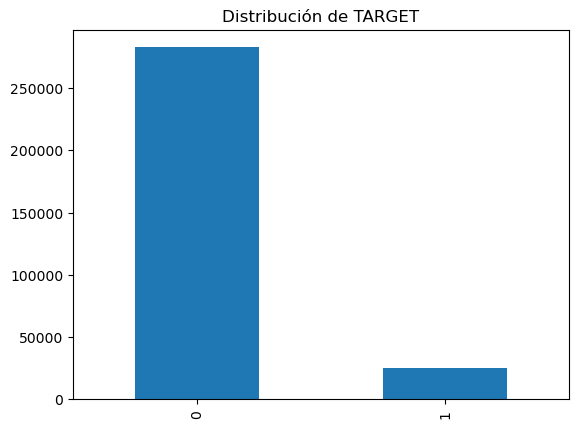

In [110]:
# distrbución de la variable objetivo
df_application['TARGET'].value_counts().plot(kind='bar', title='Distribución de TARGET')
plt.show()

In [111]:
# exploración de la variable objetivo y tratamiento
pd_plot_target = df_application['TARGET']\
        .value_counts(normalize=True)\
        .mul(100).rename('percent').reset_index()

pd_plot_target_conteo = df_application['TARGET'].value_counts().reset_index()
pd_plot_target_pc = pd.merge(pd_plot_target, pd_plot_target_conteo, on=['index'], how='inner')
pd_plot_target_pc

,index,percent,TARGET
0,0,91.927118,282686
1,1,8.072882,24825


Distribución de la Variable Objetivo:

* **TARGET 0:** Representa el 91.93% de los datos, con 282,686 registros.

* **TARGET 1:** Representa el 8.07% de los datos, con 24,825 registros.

Esto indica que existe un desbalance significativo en la variable objetivo, donde casi el 92% de los registros pertenecen a la clase 0 y solo el 8% a la clase 1. Esto subraya la importancia de abordar en un futuro este desbalance para construir un modelo adecuado y efectivo de machine learning.

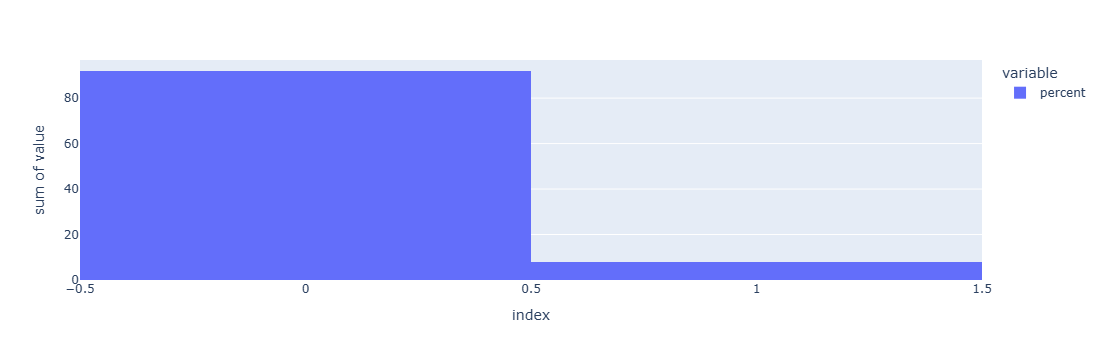

In [113]:
# histograma 
import plotly.express as px

fig = px.histogram(pd_plot_target_pc, x="index", y=['percent'])
fig.show()

## Análisis de variable objetivo y decisión final respecto a su tratamiento 

Posterior al análisis efectuado, se precisa que en este caso el 1 representa el cliente que tuvo pagos retrasados por más de X días en al menos una de las primeras Y cuotas del préstamo en la muestra, y 0 indica que el cliente no tuvo pagos retrasados significativos en esas primeras cuotas. La información sobre los pagos retrasados (valor 1) es fundamental para evaluar el riesgo de conceder préstamos. Los modelos de crédito utilizan estos datos para predecir la probabilidad de que un cliente incumpla en el futuro. Por este motivo, se mantienen ambos parámetros debido a que se busca generar modelos predictivos que puedan identificar patrones en el comportamiento de pago de los clientes.

## Selección de threshold por filas y columnas para eliminar valores missing

1. Contar y ordenar los valores nulos por columnas y filas.

2. Crear DataFrames para almacenar estos conteos y porcentajes de nulos.

3. Filtrar las columnas que tienen menos del umbral de valores nulos.

In [116]:
pd_series_null_columns = df_application.isnull().sum().sort_values(ascending=False)
pd_series_null_rows = df_application.isnull().sum(axis=1).sort_values(ascending=False)
print(pd_series_null_columns.shape, pd_series_null_rows.shape)

pd_null_columnas = pd.DataFrame(pd_series_null_columns, columns=['nulos_columnas'])     
pd_null_filas = pd.DataFrame(pd_series_null_rows, columns=['nulos_filas'])  
pd_null_filas['target'] = df_application['TARGET'].copy()
pd_null_columnas['porcentaje_columnas'] = pd_null_columnas['nulos_columnas']/df_application.shape[0]
pd_null_filas['porcentaje_filas']= pd_null_filas['nulos_filas']/df_application.shape[1]
# # pd_null

(122,) (307511,)


In [117]:
df_application.shape

(307511, 122)

In [118]:
pd_null_columnas

,nulos_columnas,porcentaje_columnas
COMMONAREA_MEDI,214865,0.698723
COMMONAREA_AVG,214865,0.698723
COMMONAREA_MODE,214865,0.698723
NONLIVINGAPARTMENTS_MODE,213514,0.694330
NONLIVINGAPARTMENTS_AVG,213514,0.694330
NONLIVINGAPARTMENTS_MEDI,213514,0.694330
FONDKAPREMONT_MODE,210295,0.683862
LIVINGAPARTMENTS_MODE,210199,0.683550
LIVINGAPARTMENTS_AVG,210199,0.683550
LIVINGAPARTMENTS_MEDI,210199,0.683550


* **Porcentaje de valores nulos:** A partir de la tabla anterior, se puede identificar que varias columnas del conjunto de datos tienen un elevado porcentaje de valores nulos. Por ejemplo, COMMONAREA_MEDI, COMMONAREA_AVG, y COMMONAREA_MODE tienen cerca del 69.87% de valores nulos, lo que señala que estos datos están mayoritariamente ausentes. Similarmente, NONLIVINGAPARTMENTS_MODE, NONLIVINGAPARTMENTS_AVG y NONLIVINGAPARTMENTS_MEDI son variables que tienen aproximadamente el 69.43% de valores nulos. Esto sugiere que estas variables podrían requerir de un tratamiento especial, como imputación de valores o eliminación de las columnas, si se considera que no aportan información significativa al caso de estudio. Detectar estas columnas con altos porcentajes de valores nulos es crucial para decidir cómo manejarlas en el preprocesamiento y, de este modo, asegurar la integridad del análisis subsiguiente.

* **Threshold=0.9:** Si se obtiene exactamente el mismo número de filas y columnas después de aplicar el filtro threshold=0.9, esto indica que ninguna de las columnas tiene más del 90% de valores nulos en el DataFrame df_application. Por lo tanto, todas las columnas cumplen con el criterio y se incluyen en el DataFrame pd_target_filter_null.

In [120]:
threshold=0.9
list_vars_not_null = list(pd_null_columnas[pd_null_columnas['porcentaje_columnas']<threshold].index)
pd_target_filter_null = df_application.loc[:, list_vars_not_null]
pd_target_filter_null.shape

(307511, 122)

In [121]:
pd_null_filas

,nulos_filas,target,porcentaje_filas
185713,61,0,0.5
133770,61,0,0.5
197736,61,0,0.5
116937,61,0,0.5
269492,61,0,0.5
...,...,...,...
129942,0,0,0.0
129929,0,0,0.0
129924,0,0,0.0
129911,0,0,0.0


## Tipos de variables categóricas y numéricas

Se convierten las variables categóricas a tipo "category" y se muestran las primeras filas del DataFrame filtrado y convertido.

In [123]:
list_cat_vars, other = dame_variables_categoricas(dataset=pd_target_filter_null)
pd_target_filter_null[list_cat_vars] = pd_target_filter_null[list_cat_vars].astype("category")
pd_target_filter_null[list_cat_vars].head()

,FONDKAPREMONT_MODE,WALLSMATERIAL_MODE,HOUSETYPE_MODE,EMERGENCYSTATE_MODE,OCCUPATION_TYPE,NAME_TYPE_SUITE,CNT_CHILDREN,FLAG_DOCUMENT_8,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_9,FLAG_DOCUMENT_21,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_OWN_REALTY,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_12,FLAG_PHONE,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,TARGET,REG_CITY_NOT_LIVE_CITY,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,REG_REGION_NOT_LIVE_REGION,HOUR_APPR_PROCESS_START,WEEKDAY_APPR_PROCESS_START,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,FLAG_EMAIL,FLAG_CONT_MOBILE,ORGANIZATION_TYPE,FLAG_WORK_PHONE,FLAG_EMP_PHONE,FLAG_MOBIL,NAME_HOUSING_TYPE,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE
0,reg oper account,"Stone, brick",block of flats,No,Laborers,Unaccompanied,0,0,Cash loans,M,N,0,1,0,0,0,0,0,0,0,0,Y,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,10,WEDNESDAY,2,2,0,1,Business Entity Type 3,0,1,1,House / apartment,Single / not married,Secondary / secondary special,Working
1,reg oper account,Block,block of flats,No,Core staff,Family,0,0,Cash loans,F,N,0,1,0,0,0,0,0,0,0,0,N,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,11,MONDAY,1,1,0,1,School,0,1,1,House / apartment,Married,Higher education,State servant
2,NaN,NaN,NaN,NaN,Laborers,Unaccompanied,0,0,Revolving loans,M,Y,0,0,0,0,0,0,0,0,0,0,Y,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,9,MONDAY,2,2,0,1,Government,1,1,1,House / apartment,Single / not married,Secondary / secondary special,Working
3,NaN,NaN,NaN,NaN,Laborers,Unaccompanied,0,0,Cash loans,F,N,0,1,0,0,0,0,0,0,0,0,Y,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,WEDNESDAY,2,2,0,1,Business Entity Type 3,0,1,1,House / apartment,Civil marriage,Secondary / secondary special,Working
4,NaN,NaN,NaN,NaN,Core staff,Unaccompanied,0,1,Cash loans,M,N,0,0,0,0,0,0,0,0,0,0,Y,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,11,THURSDAY,2,2,0,1,Religion,0,1,1,House / apartment,Single / not married,Secondary / secondary special,Working


In [124]:
list_cat_vars

['FONDKAPREMONT_MODE',
 'WALLSMATERIAL_MODE',
 'HOUSETYPE_MODE',
 'EMERGENCYSTATE_MODE',
 'OCCUPATION_TYPE',
 'NAME_TYPE_SUITE',
 'CNT_CHILDREN',
 'FLAG_DOCUMENT_8',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_21',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_OWN_REALTY',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_12',
 'FLAG_PHONE',
 'LIVE_CITY_NOT_WORK_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'TARGET',
 'REG_CITY_NOT_LIVE_CITY',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'REG_REGION_NOT_LIVE_REGION',
 'HOUR_APPR_PROCESS_START',
 'WEEKDAY_APPR_PROCESS_START',
 'REGION_RATING_CLIENT_W_CITY',
 'REGION_RATING_CLIENT',
 'FLAG_EMAIL',
 'FLAG_CONT_MOBILE',
 'ORGANIZATI

Se cuenta la frecuencia de cada categoría en la columna HOUSETYPE_MODE.

In [126]:
pd_target_filter_null['HOUSETYPE_MODE'].value_counts()

block of flats      150503
specific housing      1499
terraced house        1212
Name: HOUSETYPE_MODE, dtype: int64

Se cuenta la frecuencia de cada categoría en la columna FONDKAPREMONT_MODE.

In [128]:
pd_target_filter_null['FONDKAPREMONT_MODE'].value_counts()

reg oper account         73830
reg oper spec account    12080
not specified             5687
org spec account          5619
Name: FONDKAPREMONT_MODE, dtype: int64

In [129]:
pd_target_filter_null[list_cat_vars].dtypes

FONDKAPREMONT_MODE             category
WALLSMATERIAL_MODE             category
HOUSETYPE_MODE                 category
EMERGENCYSTATE_MODE            category
OCCUPATION_TYPE                category
NAME_TYPE_SUITE                category
CNT_CHILDREN                   category
FLAG_DOCUMENT_8                category
NAME_CONTRACT_TYPE             category
CODE_GENDER                    category
FLAG_OWN_CAR                   category
FLAG_DOCUMENT_2                category
FLAG_DOCUMENT_3                category
FLAG_DOCUMENT_4                category
FLAG_DOCUMENT_5                category
FLAG_DOCUMENT_6                category
FLAG_DOCUMENT_7                category
FLAG_DOCUMENT_9                category
FLAG_DOCUMENT_21               category
FLAG_DOCUMENT_10               category
FLAG_DOCUMENT_11               category
FLAG_OWN_REALTY                category
FLAG_DOCUMENT_13               category
FLAG_DOCUMENT_14               category
FLAG_DOCUMENT_15               category


In [130]:
pd_target_filter_null[other].head(10)

,DAYS_ID_PUBLISH,DAYS_EMPLOYED,DAYS_BIRTH,SK_ID_CURR
0,-2120,-637,-9461,100002
1,-291,-1188,-16765,100003
2,-2531,-225,-19046,100004
3,-2437,-3039,-19005,100006
4,-3458,-3038,-19932,100007
5,-477,-1588,-16941,100008
6,-619,-3130,-13778,100009
7,-2379,-449,-18850,100010
8,-3514,365243,-20099,100011
9,-3992,-2019,-14469,100012


In [131]:
print(pd_target_filter_null["DAYS_ID_PUBLISH"].value_counts().count())
pd_target_filter_null["DAYS_ID_PUBLISH"]\
    .apply(lambda x: str(x).lower().strip()).value_counts(normalize=True)#.count()

6168


-4053    0.000550
-4095    0.000527
-4046    0.000524
-4417    0.000517
-4256    0.000514
           ...   
-5808    0.000003
-6183    0.000003
-6086    0.000003
-5652    0.000003
-6220    0.000003
Name: DAYS_ID_PUBLISH, Length: 6168, dtype: float64

Ambas líneas devuelven el número 6168, indicando que antes y después de la normalización, hay 6168 valores únicos en DAYS_ID_PUBLISH.

In [133]:
print(pd_target_filter_null["DAYS_ID_PUBLISH"].value_counts().count())
pd_target_filter_null["DAYS_ID_PUBLISH"]\
    .apply(lambda x: str(x).lower().strip()).value_counts(normalize=True).count()

6168


6168

En este apartado se convirtieron las variables categóricas a tipo "category", se guardaron en el dataframe pd_target_filter_null y se verificó que estuvieran normalizadas. Esto es un paso muy relevante para el análisis ya que posibilitará tratar de manera adecuada las variables categóricas y, de igual manera, facilitará la aplicación de técnicas de codificación y escalado necesarias para el modelado predictivo, asegurando la integridad y la consistencia de los resultados obtenidos.

## Preprocesamiento inicial de algunas variables

In [136]:
# Verificar las Columnas del DataFrame

print(pd_target_filter_null.columns)

Index(['COMMONAREA_MEDI', 'COMMONAREA_AVG', 'COMMONAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAPARTMENTS_MEDI', 'FONDKAPREMONT_MODE',
       'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAPARTMENTS_MEDI',
       ...
       'DAYS_ID_PUBLISH', 'DAYS_REGISTRATION', 'DAYS_EMPLOYED', 'DAYS_BIRTH',
       'REGION_POPULATION_RELATIVE', 'NAME_HOUSING_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE', 'SK_ID_CURR'],
      dtype='object', length=122)


In [137]:
# Verificar Tipos de Datos 

print(pd_target_filter_null.dtypes)

COMMONAREA_MEDI                  float64
COMMONAREA_AVG                   float64
COMMONAREA_MODE                  float64
NONLIVINGAPARTMENTS_MODE         float64
NONLIVINGAPARTMENTS_AVG          float64
NONLIVINGAPARTMENTS_MEDI         float64
FONDKAPREMONT_MODE              category
LIVINGAPARTMENTS_MODE            float64
LIVINGAPARTMENTS_AVG             float64
LIVINGAPARTMENTS_MEDI            float64
FLOORSMIN_AVG                    float64
FLOORSMIN_MODE                   float64
FLOORSMIN_MEDI                   float64
YEARS_BUILD_MEDI                 float64
YEARS_BUILD_MODE                 float64
YEARS_BUILD_AVG                  float64
OWN_CAR_AGE                      float64
LANDAREA_MEDI                    float64
LANDAREA_MODE                    float64
LANDAREA_AVG                     float64
BASEMENTAREA_MEDI                float64
BASEMENTAREA_AVG                 float64
BASEMENTAREA_MODE                float64
EXT_SOURCE_1                     float64
NONLIVINGAREA_MO

In [138]:
# Contar valores NaN en cada columna
nan_counts = pd_target_filter_null.isnull().sum()

# Mostrar el conteo de NaN por columna
print(nan_counts)

COMMONAREA_MEDI                 214865
COMMONAREA_AVG                  214865
COMMONAREA_MODE                 214865
NONLIVINGAPARTMENTS_MODE        213514
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAPARTMENTS_MEDI        213514
FONDKAPREMONT_MODE              210295
LIVINGAPARTMENTS_MODE           210199
LIVINGAPARTMENTS_AVG            210199
LIVINGAPARTMENTS_MEDI           210199
FLOORSMIN_AVG                   208642
FLOORSMIN_MODE                  208642
FLOORSMIN_MEDI                  208642
YEARS_BUILD_MEDI                204488
YEARS_BUILD_MODE                204488
YEARS_BUILD_AVG                 204488
OWN_CAR_AGE                     202929
LANDAREA_MEDI                   182590
LANDAREA_MODE                   182590
LANDAREA_AVG                    182590
BASEMENTAREA_MEDI               179943
BASEMENTAREA_AVG                179943
BASEMENTAREA_MODE               179943
EXT_SOURCE_1                    173378
NONLIVINGAREA_MODE              169682
NONLIVINGAREA_AVG        

Imprime el resultado del conteo de NaN para que el analista pueda identificar qué columnas tienen valores faltantes y cuántos.

Es importante debido a que,

* Permite identificar columnas con un alto porcentaje de datos faltantes.
* Proporciona una guía para priorizar el tratamiento de estas columnas.

In [140]:
# Preprocesamiento de columnas con porcentajes manteniendo nulos
mask_int_rate = pd_target_filter_null['COMMONAREA_MEDI'].notna()
mask_revol = pd_target_filter_null['COMMONAREA_AVG'].notna()

pd_target_filter_null.loc[mask_int_rate, 'COMMONAREA_MEDI'] = pd_target_filter_null.loc[mask_int_rate, 'COMMONAREA_MEDI'].astype(str).str.replace('%', '')
pd_target_filter_null.loc[mask_revol, 'COMMONAREA_AVG'] = pd_target_filter_null.loc[mask_revol, 'COMMONAREA_AVG'].astype(str).str.replace('%', '')

pd_target_filter_null.loc[:,['COMMONAREA_MEDI', 'COMMONAREA_AVG']] = pd_target_filter_null.loc[:,['COMMONAREA_MEDI', 'COMMONAREA_AVG']].apply(pd.to_numeric, errors='coerce')

# Procesamiento de columnas numéricas preservando nulos
pd_target_filter_null['NONLIVINGAPARTMENTS_MODE'] = pd.to_numeric(pd_target_filter_null['NONLIVINGAPARTMENTS_MODE'], errors='coerce')
pd_target_filter_null['LIVINGAPARTMENTS_MODE'] = pd.to_numeric(pd_target_filter_null['LIVINGAPARTMENTS_MODE'], errors='coerce')
pd_target_filter_null['LIVINGAPARTMENTS_AVG'] = pd.to_numeric(pd_target_filter_null['LIVINGAPARTMENTS_AVG'], errors='coerce')

# Procesamiento de columnas categóricas manteniendo nulos
categorical_columns = ['NAME_HOUSING_TYPE', 'NAME_FAMILY_STATUS', 'NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE']
for col in categorical_columns:
    pd_target_filter_null[col] = pd_target_filter_null[col].astype('category')

# Procesamiento de fechas preservando nulos
date_columns = ['DAYS_ID_PUBLISH', 'DAYS_REGISTRATION', 'DAYS_EMPLOYED', 'DAYS_BIRTH']
for col in date_columns:
    pd_target_filter_null[col] = pd.to_numeric(pd_target_filter_null[col], errors='coerce')

# Si hay columnas con meses, mantenemos la estructura original pero protegiendo nulos
months = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
    'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}

# Solo si existen columnas con fechas en formato mes-año
if 'application_date' in pd_target_filter_null.columns:
    mask_dates = pd_target_filter_null['application_date'].notna()
    
    pd_target_filter_null.loc[mask_dates, 'application_date_month'] = pd_target_filter_null.loc[mask_dates, 'application_date']\
        .apply(lambda x: x.split('-')[0])\
        .replace(months)
    
    pd_target_filter_null.loc[mask_dates, 'application_date_year'] = pd_target_filter_null.loc[mask_dates, 'application_date']\
        .apply(lambda x: x.split('-')[1])
    
    pd_target_filter_null['application_date_month'] = pd.to_numeric(pd_target_filter_null['application_date_month'], errors='coerce')
    pd_target_filter_null['application_date_year'] = pd.to_numeric(pd_target_filter_null['application_date_year'], errors='coerce')

Cada columna se maneja de acuerdo a su categoría: las columnas con porcentajes se transforman en valores numéricos, suprimiendo símbolos no deseados y manteniendo los valores nulos; las columnas categóricas se convierten en categoría para maximizar el uso de memoria y simplificar el análisis de frecuencias; y las fechas o valores temporales son tratadas numéricamente, facilitando cálculos matemáticos y análisis de tiempo más exactos. Adicionalmente, las columnas con meses y años en formato texto se fragmentan en dos variables distintas (mes y año), lo que incrementa su interpretación y beneficio en análisis de tiempo. La perspectiva contempla la conservación de valores nulos en todas las transformaciones, lo que resulta crucial para una gestión apropiada de los datos ausentes en etapas subsiguientes. Esta práctica garantiza que los datos se mantengan organizados y coherentes, al mismo tiempo que se disminuyen los errores al manejar diversos tipos de datos.

In [142]:
# Guardar conteo de nulos antes
nulos_antes = pd_target_filter_null.isnull().sum()

# Ejecutar el código de transformación

# Verificar nulos después
nulos_despues = pd_target_filter_null.isnull().sum()

# Comparar
print(nulos_antes == nulos_despues)

COMMONAREA_MEDI                 True
COMMONAREA_AVG                  True
COMMONAREA_MODE                 True
NONLIVINGAPARTMENTS_MODE        True
NONLIVINGAPARTMENTS_AVG         True
NONLIVINGAPARTMENTS_MEDI        True
FONDKAPREMONT_MODE              True
LIVINGAPARTMENTS_MODE           True
LIVINGAPARTMENTS_AVG            True
LIVINGAPARTMENTS_MEDI           True
FLOORSMIN_AVG                   True
FLOORSMIN_MODE                  True
FLOORSMIN_MEDI                  True
YEARS_BUILD_MEDI                True
YEARS_BUILD_MODE                True
YEARS_BUILD_AVG                 True
OWN_CAR_AGE                     True
LANDAREA_MEDI                   True
LANDAREA_MODE                   True
LANDAREA_AVG                    True
BASEMENTAREA_MEDI               True
BASEMENTAREA_AVG                True
BASEMENTAREA_MODE               True
EXT_SOURCE_1                    True
NONLIVINGAREA_MODE              True
NONLIVINGAREA_AVG               True
NONLIVINGAREA_MEDI              True
E

El contraste entre los valores nulos previos y posteriores al procesamiento revela que no se registraron variaciones en la cantidad de valores nulos para ninguna de las columnas del dataset. Esto asegura que los cambios realizados en el preprocesamiento mantienen adecuadamente los valores ausentes, sin modificarlos ni suprimirlos de manera accidental durante las operaciones. Esta conservación garantiza que el preprocesamiento se concentró exclusivamente en cambiar los datos existentes (como transformar porcentajes en valores numéricos, gestionar categorías o desglosar fechas) sin alterar la estructura original del dataset. Este método posibilita el trabajo seguro, preservando la integridad de los datos y asegurando que los análisis posteriores representen con precisión la calidad inicial del conjunto de datos.

In [144]:
pd_target_filter_null.head() 

,COMMONAREA_MEDI,COMMONAREA_AVG,COMMONAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAPARTMENTS_AVG,NONLIVINGAPARTMENTS_MEDI,FONDKAPREMONT_MODE,LIVINGAPARTMENTS_MODE,LIVINGAPARTMENTS_AVG,LIVINGAPARTMENTS_MEDI,FLOORSMIN_AVG,FLOORSMIN_MODE,FLOORSMIN_MEDI,YEARS_BUILD_MEDI,YEARS_BUILD_MODE,YEARS_BUILD_AVG,OWN_CAR_AGE,LANDAREA_MEDI,LANDAREA_MODE,LANDAREA_AVG,BASEMENTAREA_MEDI,BASEMENTAREA_AVG,BASEMENTAREA_MODE,EXT_SOURCE_1,NONLIVINGAREA_MODE,NONLIVINGAREA_AVG,NONLIVINGAREA_MEDI,ELEVATORS_MEDI,ELEVATORS_AVG,ELEVATORS_MODE,WALLSMATERIAL_MODE,APARTMENTS_MEDI,APARTMENTS_AVG,APARTMENTS_MODE,ENTRANCES_MEDI,ENTRANCES_AVG,ENTRANCES_MODE,LIVINGAREA_AVG,LIVINGAREA_MODE,LIVINGAREA_MEDI,HOUSETYPE_MODE,FLOORSMAX_MODE,FLOORSMAX_MEDI,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_AVG,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OCCUPATION_TYPE,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_TYPE_SUITE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE,CNT_CHILDREN,FLAG_DOCUMENT_8,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_9,FLAG_DOCUMENT_21,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_OWN_REALTY,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_12,AMT_CREDIT,AMT_INCOME_TOTAL,FLAG_PHONE,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,TARGET,REG_CITY_NOT_LIVE_CITY,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,REG_REGION_NOT_LIVE_REGION,HOUR_APPR_PROCESS_START,WEEKDAY_APPR_PROCESS_START,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,FLAG_EMAIL,FLAG_CONT_MOBILE,ORGANIZATION_TYPE,FLAG_WORK_PHONE,FLAG_EMP_PHONE,FLAG_MOBIL,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_EMPLOYED,DAYS_BIRTH,REGION_POPULATION_RELATIVE,NAME_HOUSING_TYPE,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE,SK_ID_CURR
0,0.0144,0.0143,0.0144,0.0,0.0000,0.0000,reg oper account,0.022,0.0202,0.0205,0.1250,0.1250,0.1250,0.6243,0.6341,0.6192,NaN,0.0375,0.0377,0.0369,0.0369,0.0369,0.0383,0.083037,0.0,0.0000,0.00,0.00,0.00,0.0000,"Stone, brick",0.0250,0.0247,0.0252,0.0690,0.0690,0.0690,0.0190,0.0198,0.0193,block of flats,0.0833,0.0833,0.0833,0.9722,0.9722,0.9722,0.0149,No,Laborers,0.139376,0.0,0.0,0.0,0.0,0.0,1.0,Unaccompanied,2.0,2.0,2.0,2.0,0.262949,351000.0,24700.5,1.0,-1134.0,0,0,Cash loans,M,N,0,1,0,0,0,0,0,0,0,0,Y,0,0,0,0,0,0,0,0,0,406597.5,202500.0,1,0,0,1,0,0,0,0,10,WEDNESDAY,2,2,0,1,Business Entity Type 3,0,1,1,-2120,-3648.0,-637,-9461,0.018801,House / apartment,Single / not married,Secondary / secondary special,Working,100002
1,0.0608,0.0605,0.0497,0.0,0.0039,0.0039,reg oper account,0.079,0.0773,0.0787,0.3333,0.3333,0.3333,0.7987,0.8040,0.7960,NaN,0.0132,0.0128,0.0130,0.0529,0.0529,0.0538,0.311267,0.0,0.0098,0.01,0.08,0.08,0.0806,Block,0.0968,0.0959,0.0924,0.0345,0.0345,0.0345,0.0549,0.0554,0.0558,block of flats,0.2917,0.2917,0.2917,0.9851,0.9851,0.9851,0.0714,No,Core staff,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Family,1.0,0.0,1.0,0.0,0.622246,1129500.0,35698.5,2.0,-828.0,0,0,Cash loans,F,N,0,1,0,0,0,0,0,0,0,0,N,0,0,0,0,0,0,0,0,0,1293502.5,270000.0,1,0,0,0,0,0,0,0,11,MONDAY,1,1,0,1,School,0,1,1,-291,-1186.0,-1188,-16765,0.003541,House / apartment,Married,Higher education,State servant,100003
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Laborers,0.729567,0.0,0.0,0.0,0.0,0.0,0.0,Unaccompanied,0.0,0.0,0.0,0.0,0.555912,135000.0,6750.0,1.0,-815.0,0,0,Revolving loans,M,Y,0,0,0,0,0,0,0,0,0,0,Y,0,0,0,0,0,0,0,0,0,135000.0,67500.0,1,0,0,0,0,0,0,0,9,

In [145]:
pd_target_filter_null.shape

(307511, 122)

In [146]:
# Definicion de la ruta para el guardado de los datos
processed_data_path = '../data/preprocessed_data'

# Crear el directorio si no existe
os.makedirs(processed_data_path, exist_ok=True)

# Definir la ruta del nuevo archivo
file_path = os.path.join(processed_data_path, 'bank_data_preprocessed.csv')

# Guardado del CSV
pd_target_filter_null.to_csv(file_path, index=False)

print(f"File saved at: {file_path}")


File saved at: ../data/preprocessed_data\bank_data_preprocessed.csv


Finalmente, se hizo un preprocesamiento inicial de algunas variables. Así pues, se imprimieron los nombres de las columnas y sus tipos de datos para revisar la estructura del DataFrame pd_target_filter_null. Se contaron los valores nulos en cada columna para evaluar la calidad de los datos y se verificó que todas las columnas estuvieran correctamente preparadas para la transformación. Estos pasos iniciales son esenciales para entender el estado actual de los datos, identificar posibles problemas de calidad y asegurar que las transformaciones que se harán en el futuro se realicen sobre datos consistentes y limpios.

Posteriormente, se compararon los valores nulos antes y después de las transformaciones para confirmar que no se introdujeron nuevos valores nulos durante el procesamiento. Este tipo de verificación es crucial para mantener la integridad de los datos y garantizar que las operaciones de preprocesamiento no afecten negativamente la calidad de los datos. Por último, el DataFrame procesado se guardó en un archivo CSV en un directorio específico, asegurando que los datos preparados están listos para ser empleados en futuras etapas del análisis y modelado predictivo. Este proceso de validación y almacenamiento es primordial para alcanzar una gestión eficiente y precisa de los datos.